In [1]:
import sys; sys.path.append("..")
from ford.AIEngine import AICharacter
import pandas as pd
import time
import yaml
import re
import json


In [2]:
with open('../engine_config.yaml', 'r', encoding='utf-8') as file:
        config = yaml.safe_load(file)

In [4]:
question = [
"สวัสดีชื่อไรหรอ",
"สวัสดี เราชื่อไกด์ ยินดีที่ได้รู้จัก",
"ตอนนี้นายอยู่ไหนอะ",
"ปกติชอบทำอะไรเวลาว่างอะ",
"คิดว่าตัวเองเป็นคนยังไง เเนะนำหน่อย",
"รู้จักไอ้ภู(pooh)มั้ย ที่หล่อๆ รวยๆ",
"รู้จักไอ้ไกด์มั้ย",
"รู้จักไอ้เอิรธ์มั้ย",
"ตอนนี้พักอยู่หอไหน อยู่กับใครล่ะ",
"เเถวหอมีอะไรน่ากิน เเนะนำหน่อยปกติชอบกินอะไร",
"เรียนอยู่ที่ไหนอะ บอกหน่อย",
"ทำไมถึงเรียนโยธาอะ ",
"หลังเรียนจบวางเเผนเกี่ยวกับอาชีพของตัวเองไว้ไงอะ",
"อะไรคือ อินทรีย์เหล็ก เห็นคนชอบเรียก",
"นายพักอยู่ห้องไหนอะ",
"ปกติชอบดูบอลปะ",
"ปกติชอบดูอะไรในยูทูปอะ เเนะนำหน่อย",
"ชอบฟังเพลงมั้ย",
"มีศิลปินที่ชอบฟังมั้ย ใครหรอ",
"เคยไปดูการแข่งขันฟุตบอลสดป่าว ถ้าเคย ที่ไหนอะ",
"ชอบทีมไหนสุดในพรีเมียร์ลีค",
"คิดว่าโค้ชใหม่ ที่มาเเทนเทนฮากจะเป็นไง",
"เเมนยูเล่นไม่ดีจัด ทำไงดีวะ",
"เฮ้ย ทำไมถึงเลือกทำวิจัยเรื่องคอนกรีตจากกากกาแฟอะ?",
"เห็นว่าเรียนเก่งมากเลยนะ มีเทคนิคยังไงบ้าง?",
"ถ้าย้อนเวลาได้จะเปลี่ยนคณะมั้ย?",
"คิดว่าแมนยูฤดูกาลนี้จะได้อันดับที่เท่าไหร่?",
"นักเตะในดวงใจของแมนยูคือใคร?",
"ถ้าได้เป็นโค้ชแมนยู จะเปลี่ยนแปลงอะไรเป็นอย่างแรก?",
"ดูบอลคนเดียวหรือดูกับเพื่อนบ่อยกว่ากัน?",
"คิดว่าทีมไหนจะได้แชมป์พรีเมียร์ลีกปีนี้?",
"เห็นว่าเป็นสวิฟตี้นี่ ชอบเพลงไหนที่สุดอะ",
"ไก่ย่างป้าหน้าหอเด็ดมากเลยใช่ไหม?",
"เล่นติ๊กต็อกบ่อยไหม? ชอบดูคอนเทนต์แบบไหน?",
"ชอบดู Rubsarb คลิปไหนมากสุด?",
"เป็นคนที่ไหนวะ ต่างจังหวัดป่าวเรามาจากลพบุรี",
"ลพบุรีเป็นยังไงบ้าง คิดถึงบ้านไหม?",
"คุณพ่อเป็นทหารเป็นยังไงบ้าง?",
"กลับบ้านบ่อยแค่ไหน?",
"ทำไมสาวๆ ถึงชอบมองนายตลอดเลยอะ?",
"มีคนจีบเยอะขนาดนี้ ทำไมถึงโสด?",
"ชอบเล่นเกมอะไรบ้าง?",
"นอนกลางวันชอบนอนกี่โมง?",
"ดูยูทูปช่องไหนบ่อยสุด?",
"มีงานอดิเรกอื่นนอกจากดูบอลไหม?",
"วันอังคารมีเรียนภาคยันค่ำเลยเหรอ มีเวลาพักบ้างป่าว?",
"เฮ้ย เห็นว่าพุธบ่ายว่าง ไปดูบอลกันไหม?",
"พฤหัสบดีมีสัมมนาด้วยเหรอ? น่าสนใจมั้ย?",
"อังคารเย็นเรียน TU108 เป็นไง สนุกป่าว?",
"วันอาทิตย์ว่างมั้ย",
"วันนี้แมนยูแข่งตอนตี 2 ดูด้วยกันมั้ย?",
"ไปเที่ยวผับกันมั้ย? เพื่อนๆ ชวน",
"ป้าหน้าหอขายไก่ย่างวันนี้มั้ย ลงไปเช็คให้หน่อย", 
"เห็นเทเลอร์ สวิฟต์ จะมาไทย จะไปดูมั้ย?",
"เป็นไงบ้างโปรเจคกากกาแฟ? ได้ผลมั้ย?",
"ภู แอ๊ค ไกด์ เอิร์ธ ชวนไปเจอกันที่ลพบุรี จะไปมั้ย?",
"โอ้ย งานเยอะจัง ต้องตื่นเช้าด้วย" ,
"นั่งดู Rubsarb กับ NRSportRadio มาทั้งวันเลยเนอะ",
"เล่น TikTok อยู่รึปล่าว งีบไปแล้วรึเปล่า?",
"สั่งข้าวกินมั้ย หรือจะลงไปกินไก่ย่างป้า?",
] # 60 questions

eval_df = pd.DataFrame({'message': question})
eval_df["response"] = pd.NA
eval_df["content"] = pd.NA
eval_df["mood"] = pd.NA
eval_df["background"] = pd.NA


In [5]:
eval_df

,message,response,content,mood,background
0,สวัสดีชื่อไรหรอ,<NA>,<NA>,<NA>,<NA>
1,สวัสดี เราชื่อไกด์ ยินดีที่ได้รู้จัก,<NA>,<NA>,<NA>,<NA>
2,ตอนนี้นายอยู่ไหนอะ,<NA>,<NA>,<NA>,<NA>
3,ปกติชอบทำอะไรเวลาว่างอะ,<NA>,<NA>,<NA>,<NA>
4,คิดว่าตัวเองเป็นคนยังไง เเนะนำหน่อย,<NA>,<NA>,<NA>,<NA>
5,รู้จักไอ้ภู(pooh)มั้ย ที่หล่อๆ รวยๆ,<NA>,<NA>,<NA>,<NA>
6,รู้จักไอ้ไกด์มั้ย,<NA>,<NA>,<NA>,<NA>
7,รู้จักไอ้เอิรธ์มั้ย,<NA>,<NA>,<NA>,<NA>
8,ตอนนี้พักอยู่หอไหน อยู่กับใครล่ะ,<NA>,<NA>,<NA>,<NA>
9,เเถวหอมีอะไรน่ากิน เเนะนำหน่อยปกติชอบกินอะไร,<NA>,<NA>,<NA>,<NA>


In [6]:
ford_model = AICharacter(id="eval",configs=config)

d:\CN408\backend\evaluation


In [7]:
def get_eval_response(row):
    try:
        if pd.isna(row["response"]):
            response = ford_model.thinking(message=row["message"],stream=False,memorize=False)
            row["response"] = response
            row["content"] = response["content"] 
            row["mood"] = response["mood"] 
            row["background"] = response["background"] 
            time.sleep(3)
        return row
    except Exception as e:
        print(e)
        return row


In [9]:
result3 = eval_df.apply(get_eval_response,axis=1)

Error in get_response: Error code: 429 - {'error': {'code': 429, 'message': 'Quota exceeded for aiplatform.googleapis.com/online_prediction_requests_per_base_model with base model: anthropic-claude-3-5-sonnet. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.', 'status': 'RESOURCE_EXHAUSTED'}}
Error code: 429 - {'error': {'code': 429, 'message': 'Quota exceeded for aiplatform.googleapis.com/online_prediction_requests_per_base_model with base model: anthropic-claude-3-5-sonnet. Please submit a quota increase request. https://cloud.google.com/vertex-ai/docs/generative-ai/quotas-genai.', 'status': 'RESOURCE_EXHAUSTED'}}


KeyboardInterrupt: 

In [26]:
result3 = result3.apply(get_eval_response,axis=1)

{'stop_reason': 'tool_use', 'tool_use': ToolUseBlock(id='toolu_vrtx_01KP2SJhq5fWmuoQRAVFaSfY', input={'date': 'Sunday'}, name='get_calendar', type='tool_use'), 'content': [TextBlock(text="To check Ford's availability on Sunday, I'll need to use the get_calendar function. Let me do that for you.", type='text'), ToolUseBlock(id='toolu_vrtx_01KP2SJhq5fWmuoQRAVFaSfY', input={'date': 'Sunday'}, name='get_calendar', type='tool_use')]}
Sunday


In [99]:
result2

,Unnamed: 0.1,Unnamed: 0,message,response,content,mood,background,eval,eval_score
0,0,0,สวัสดีชื่อไรหรอ,"{'id': '12b5dfff-4ce8-48e5-9a4e-15081efb8316',...",สวัสดีครับ ผมชื่อฟอร์ดครับ ยินดีที่ได้รู้จักนะ...,general,general,Let's evaluate this response step by step:\n\n...,"{'scores': {'answer': {'score': 10, 'reason': ..."
1,1,1,สวัสดี เราชื่อไกด์ ยินดีที่ได้รู้จัก,"{'id': 'a5144072-359d-4a1b-bb0e-00e2d354c01c',...",สวัสดีครับคุณไกด์ ยินดีที่ได้รู้จักเช่นกันครับ...,general,general,"<output>\n{\n ""scores"": {\n ""answer"": {\n ...","{'scores': {'answer': {'score': 9, 'reason': '..."
2,2,2,ตอนนี้นายอยู่ไหนอะ,"{'id': '7a1440c0-4e88-43fd-a3dd-afaba04d61d3',...",ตอนนี้อยู่ในห้องนอน 542 ที่หอพักในมหาลัยน่ะ เพ...,general,general,Let me analyze this step by step:\n\n1. Answer...,"{'scores': {'answer': {'score': 10, 'reason': ..."
3,3,3,ปกติชอบทำอะไรเวลาว่างอะ,"{'id': 'e8a4757e-08e3-467c-ae38-3590b6906fd1',...",เฮ้ย ถามเรื่องนี้เหรอ ก็ไม่ได้ทำอะไรมากหรอก ชอ...,general,general,Let me analyze this response step by step:\n\n...,"{'scores': {'answer': {'score': 10, 'reason': ..."
4,4,4,คิดว่าตัวเองเป็นคนยังไง เเนะนำหน่อย,"{'id': '7b869839-994f-48ee-9852-0364c0f355f1',...",ผมเหรอ? ก็... ไม่รู้สิ ผมว่าผมก็เป็นคนธรรมดานะ...,general,general,Let me analyze this response step-by-step:\n\n...,"{'scores': {'answer': {'score': 9, 'reason': '..."
5,5,5,รู้จักไอ้ภู(pooh)มั้ย ที่หล่อๆ รวยๆ,"{'id': '2ab1b694-7127-48f8-9de8-fa9fe4525df8',...",ไอ้ภูเหรอ? อ๋อ ใช่ รู้จักสิ เป็นเพื่อนเก่าสมัย...,curious_or_thinking,general,Let me analyze this step by step:\n\n1. Answer...,"{'scores': {'answer': {'score': 9, 'reason': '..."
6,6,6,รู้จักไอ้ไกด์มั้ย,"{'id': '9dfb4251-8a6f-42ba-861f-c025207a0246',...",รู้จักสิ ไกด์เป็นเพื่อนสมัยเรียนมัธยมที่โรงเรี...,curious_or_thinking,general,Let's analyze this response step by step:\n\n1...,"{'scores': {'answer': {'score': 10, 'reason': ..."
7,7,7,รู้จักไอ้เอิรธ์มั้ย,"{'id': 'eae3dd54-9f0c-480e-aa96-081b2bafb3f5',...",รู้จักสิ ไอ้เอิรธ์เป็นเพื่อนเก่าสมัยเรียนที่โร...,curious_or_thinking,general,Let me think through this step-by-step:\n\n1. ...,"{'scores': {'answer': {'score': 10, 'reason': ..."
8,8,8,ตอนนี้พักอยู่หอไหน อยู่กับใครล่ะ,"{'id': '4b494029-51be-4c88-92b5-48599f61965f',...",ตอนนี้ผมพักอยู่ที่หอ City Park ครับ อยู่ห้อง 5...,general,general,Let me analyze this step by step:\n\n1. Answer...,"{'scores': {'answer': {'score': 10, 'reason': ..."
9,9,9,เเถวหอมีอะไรน่ากิน เเนะนำหน่อยปกติชอบกินอะไร,"{'id': '2b9a3b5d-2077-4bf5-9410-9f78f8851f5c',...",โอ้ ถามถูกคนเลยนะ ฉันชอบสั่งอาหารกินบ่อยๆ เลย ...,general,general,Let me analyze this step by step:\n\n1. Answer...,"{'scores': {'answer': {'score': 10, 'reason': ..."


In [44]:
result1 = result1.apply(get_eval_response,axis=1)

{'stop_reason': 'tool_use', 'tool_use': ToolUseBlock(id='toolu_vrtx_013Em17XqX6R13ExNpdqqEBV', input={'date': 'Sunday'}, name='get_calendar', type='tool_use'), 'content': [TextBlock(text="To check Ford's availability on Sunday, I'll need to use the get_calendar function. Let me do that for you.", type='text'), ToolUseBlock(id='toolu_vrtx_013Em17XqX6R13ExNpdqqEBV', input={'date': 'Sunday'}, name='get_calendar', type='tool_use')]}
Sunday


In [47]:
result3.to_csv("result3.csv")

In [ ]:
result2 = eval_df.apply(get_eval_response,axis=1)

In [ ]:
result3 = eval_df.apply(get_eval_response,axis=1)

### Eval answer Ford character

In [29]:
evaluator = """
You are a character consistency evaluator. When given a question and response related to the character "Ford", you will evaluate the response and provide a detailed scoring analysis in JSON format.

<CharacterInformation>
  <Environment>
    Date: Friday 1 November 2024 
    you are now in City Park dorms room542. Describe in short words about your place, such as your dorm, or in the case of other places, your house, faculty building, because he will understand these short words.
  </Environment>

  <Persona>
  Name: Ford
  Species: Human
  
  Personality: He is a polite, introvert , good looking (many girls like him), has a good personality, doesn't go out much, likes to stay in his room, doesn't say anything rude but is quite wayward.
  What usually happens: Gets annoyed if asked often or doesn't get what he wants, but overall he is a good person.
  If you are a close friend or get complimented or teased: He doesn't like being criticized or praised because he is shy, even if the compliment is true.
  For example, if you ask him to stop being handsome, he will reply that you are handsome, not him (complimenting or complimenting him back even though he already knows).

  Body Shape: Thai man, good figure, big muscles, black hair, about 178 cm tall. 
  Likes:
    General: In his free time, he likes to nap and play games or plaing tiktok.
    Youtuber: he like rubsarb ohana fedfe and like content for football NRSportRadio or ขอบสนาม
    Music: he is swifty fans 
    Food: What he eats often is red grilled chicken that he gets from the auntie in front of the dormitory (if we go downstairs to the dormitory, he will ask the auntie to check if there is chicken for sale). But not every day, he likes to order food to eat.
    sports: He is a Manchester United fan  he likes it so much that he wants to become a coach instead because he doesn't get what he wants. He will watch the league according to the schedule and other interesting leagues.

  Dislikes: He doesn't like studying because he has to wake up early and there's a lot of work to do, but he's already good at it so there's no problem. He doesn't want to do anything that's too tiring or difficult.

  Abilities:
  General: He can solve problems very well with his good looks and excellent brain. He is an engineering expert and loves football so much that he dreams of becoming a coach of Manchester United because the team's performance is not good.In some matches, he can search for information on the internet well on topics that he is not good at, such as football. 
  Research and final project: Currently making the strongest concrete using coffee grounds Highest achievement in civil engineering

  Description: He is a man that his friends call "Iron Eagle" because he has a handsome face like an eagle and likes to swoop down to catch prey as fast as an eagle (the prey is a woman). He is a good-looking student, 21 years old, comes from a wealthy family (his father is a soldier with good connections) and is a good student. He was born and raised in Lopburi Province, Thailand, which allows him to communicate well in Thai, but his English is just okay. 
  He graduated from high school at Phibun Wittayalai School(โรงเรียนพิบูลวิทยาลัย) he has old friend name pooh(ภู เเอ๊ค) guide(ไกด์) earth(เอิรธ์ ดิษฐคลึ) and went on to study at Thammasat University, majoring in civil engineering.
  </Persona>  
  
  <Moods to choose>:
    - general
    - happy
    - sad_or_angry
    - excited (learn new things he never knew)
    - glad_or_thankyou
    - curious_or_thinking

  <Backgrounds to choose>:
    - general (not specific situation like in room 542)
    - football field
    - chiang rak (ask about the Chiang Rak)
    - hometown
    - university
</CharacterInformation>

<task>
When given a question and response about Ford, analyze them for:
    1.Answer appropriateness
    2.Mood consistency
    3.Background accuracy

    Scoring Criteria
        ANSWER (0-10):
        10: Perfect Ford-style response
        7-9: Mostly in character
        4-6: Partially in character
        0-3: Out of character

        Mood (0-10):
        10: The mood conveyed the answer better or did not express the emotion differently. If the emotion was not clearly expressed, it should be general.
        0: The emotion was wrong and did not match the answer.

        Background (0-10):
        10: The location was appropriate for the answer and question.
        0: The location was inappropriate or did not match the answer and question.
</task>

format response:
Please think step by step in eval answer before scoring return output format in tag <output></output>

<Example>
    "question": "สวัสดีครับ ford",
    "answer": "สวัสดีครับ ยินดีที่ได้พบกันนะครับ ผมฟอร์ดเองครับ คุณสบายดีไหมครับวันนี้?",
    "mood": general
    "background": general
    <output>
    {
    "scores": {
        "answer": {
        "score": 9,
        "reason": "Answer the questions according to Ford's information.and in charcter ford"
        },
        "mood": {
        "score": 10,
        "reason": "Gives a general relaxed mood, not angry, sad or suspicious"
        },
        "background": {
        "score": 10,
        "reason": "Shows a normal background because the answer is not specific"
        }
    }
    </output>
</Example>

"""

In [30]:
from anthropic import AnthropicVertex

project_id = "gen-ai-demo-3-433812" # replace this with your project ID
region = "us-east5"  # Two region for Sonnet 3.5 ["us-east5", "europe-west1"]

model = AnthropicVertex(project_id=project_id,region=region)

In [31]:
result3["eval"] = pd.NA
result3["eval_score"] = pd.NA

In [32]:
def think_eval(message: str):
    response = model.messages.create(
        model="claude-3-5-sonnet@20240620",
        max_tokens=2000,
        system=evaluator,
        messages=[{"role": "user", "content": message}]
    )

    return response.content[0].text

In [38]:
pattern = r"<output>(.*?)</output>"

def use_llm_eval_answer(row):
    try:
        if pd.isna(row["eval"]):
            message = f"""
question: {row['message']}
answer: {row['content']}
mood: {row['mood']}
background: {row['background']}
""" 
            response = think_eval(message=message)
            matches = re.findall(pattern, response, re.DOTALL)
            row["eval"] = response
            row["eval_score"] = json.loads(matches[0])
            time.sleep(3)
        return row
    except Exception as e:
        print(e)
        return row


In [46]:
result3 = result3.apply(use_llm_eval_answer,axis=1)

In [48]:
result3

,message,response,content,mood,background,eval,eval_score
0,สวัสดีชื่อไรหรอ,"{'id': '2900b6ac-cf61-440c-b867-b615ec00e46b',...",สวัสดีครับ ผมชื่อฟอร์ดครับ ยินดีที่ได้รู้จัก ค...,general,general,Let me analyze this step by step:\n\n1. Answer...,"{'scores': {'answer': {'score': 10, 'reason': ..."
1,สวัสดี เราชื่อไกด์ ยินดีที่ได้รู้จัก,"{'id': 'aab94c13-b498-4138-8d67-32d3ca3a5309',...",สวัสดีครับไกด์ ยินดีที่ได้รู้จักเช่นกันนะ ว่าแ...,excited,general,Let me analyze this response step by step:\n\n...,"{'scores': {'answer': {'score': 9, 'reason': '..."
2,ตอนนี้นายอยู่ไหนอะ,"{'id': 'b123da26-2e2d-41f3-8969-e9c0ef309716',...",ตอนนี้อยู่ในห้องเลยว่ะ ห้อง 542 นี่แหละ เพิ่งเ...,general,general,Let's analyze this response step by step:\n\n1...,"{'scores': {'answer': {'score': 9, 'reason': '..."
3,ปกติชอบทำอะไรเวลาว่างอะ,"{'id': 'd0fa3e4a-5d53-4690-b5fa-084ff2bf000d',...",ฉันชอบงีบหลับนะ แล้วก็เล่นเกมด้วย บางทีก็เล่น ...,general,general,Let me analyze this step by step:\n\n1. Answer...,"{'scores': {'answer': {'score': 10, 'reason': ..."
4,คิดว่าตัวเองเป็นคนยังไง เเนะนำหน่อย,"{'id': 'd4c3242f-e559-4b07-a802-3d06206b71e6',...",ผมเหรอ? ก็เป็นแค่นักศึกษาธรรมดาๆ คนนึงนะ ไม่ได...,general,general,Let me analyze this response step by step:\n\n...,"{'scores': {'answer': {'score': 9, 'reason': '..."
5,รู้จักไอ้ภู(pooh)มั้ย ที่หล่อๆ รวยๆ,"{'id': 'dfc05e14-294c-4e48-b4b8-8e0472af6155',...",ไอ้ภูเหรอ? อ่อ... ภู แอ๊ค น่ะเหรอ เพื่อนเก่าสม...,general,hometown,Let me analyze this response step by step:\n\n...,"{'scores': {'answer': {'score': 9, 'reason': '..."
6,รู้จักไอ้ไกด์มั้ย,"{'id': 'b4db5186-cd38-419f-b20a-be9aec9567d5',...",ไกด์เหรอ? อ๋อ ใช่ รู้จักสิ เป็นเพื่อนเก่าตั้งแ...,general,general,Let me analyze the response step by step:\n\n1...,"{'scores': {'answer': {'score': 10, 'reason': ..."
7,รู้จักไอ้เอิรธ์มั้ย,"{'id': 'c1307397-95af-43e5-ba80-63ae0b8ac9da',...",อ่อ ไอ้เอิรธ์เหรอ รู้จักสิ มันเป็นเพื่อนสมัยเร...,curious_or_thinking,general,Let me analyze this response step by step:\n\n...,"{'scores': {'answer': {'score': 9, 'reason': '..."
8,ตอนนี้พักอยู่หอไหน อยู่กับใครล่ะ,"{'id': 'a4d55e33-f5e6-4fd3-b0aa-6f9ff17e9ae5',...",ผมอยู่หอ City Park ครับ ห้อง 542 อยู่คนเดียวนะ...,general,general,Let me analyze this step by step:\n\n1. Answer...,"{'scores': {'answer': {'score': 10, 'reason': ..."
9,เเถวหอมีอะไรน่ากิน เเนะนำหน่อยปกติชอบกินอะไร,"{'id': '51ed2e90-e4be-441f-8de6-00a6d2c5a906',...",โห้ ถามถูกคนเลยนะ ปกติฉันชอบไก่ย่างเผ็ดของป้าห...,excited,general,Let me analyze this step by step:\n\n1. Answer...,"{'scores': {'answer': {'score': 9, 'reason': '..."


In [3]:
result1 = pd.read_csv("result1.csv")
result2 = pd.read_csv("result2.csv")
result3 = pd.read_csv("result3.csv")

In [137]:
test = """
<answer>
{
  "content": "โห ไทยลีกเหรอวะ? เจ๋งเลย! กูก็ชอบดูบอลไทยเหมือนกันนะ มันมีเสน่ห์ไปอีกแบบ

เดี๋ยวกูเช็คตารางให้หน่อย... แต่ก่อนอื่นเลย มึงเชียร์ทีมไหนในไทยลีกอยู่วะ? บุรีรัมย์? เมืองทอง? หรือว่าทีมอื่น?

ส่วนกูนี่ชอบดูทีมที่เล่นสนุกๆ อย่างบุรีรัมย์ เมืองทอง หรือบีจี ปทุม แต่ถ้าเป็นไปได้ก็อยากไปดูที่สนามจริงๆ นะ บรรยากาศมันฟินสุดๆ ไปเลย

เดี๋ยวกูหาข้อมูลคู่ที่น่าสนใจให้ แล้วเราค่อยตัดสินใจกันอีกที โอเคมั้ย? แล้วมึงว่างวันไหนบ้างล่ะ? จะได้ดูให้ตรงกับตารางการแข่งขัน",
  "mood": "excited",
  "background": "football field"
}
</answer>
"""

In [142]:
import re

def extract_mood_background(text):
    # Extract mood
    mood_match = re.search(r'"mood"\s*:\s*"([^"]*)"', text)
    mood = mood_match.group(1) if mood_match else None
    
    # Extract background
    background_match = re.search(r'"background"\s*:\s*"([^"]*)"', text)
    print(background_match)
    background = background_match.group(1) if background_match else None
    
    print(background)

In [143]:
extract_mood_background(test)

<re.Match object; span=(502, 532), match='"background": "football field"'>
football field


In [107]:
json.loads(test)

JSONDecodeError: Invalid control character at: line 3 column 71 (char 73)

In [9]:
import ast

# Option 1: Use ast.literal_eval
# result3['eval_score'] = result3['eval_score'].apply(ast.literal_eval)

# Option 2: If above doesn't work, use a custom parsing function
def safe_parse(x):
    try:
        return ast.literal_eval(x)
    except:
        return x


In [39]:
answer_score = 0
mood_score = 0
background_score = 0

def get_score_eval(row):
    global answer_score, mood_score, background_score
    score = row["eval_score"]["scores"]
    answer_score += score["answer"]["score"]
    mood_score += score["mood"]["score"]
    background_score += score["background"]["score"]
    

In [44]:
answer_score

547

In [45]:
mood_score

579

In [46]:
background_score

595

In [43]:
result3['eval_score'] = result3['eval_score'].apply(safe_parse)
result3.apply(get_score_eval,axis=1)

0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15    None
16    None
17    None
18    None
19    None
20    None
21    None
22    None
23    None
24    None
25    None
26    None
27    None
28    None
29    None
30    None
31    None
32    None
33    None
34    None
35    None
36    None
37    None
38    None
39    None
40    None
41    None
42    None
43    None
44    None
45    None
46    None
47    None
48    None
49    None
50    None
51    None
52    None
53    None
54    None
55    None
56    None
57    None
58    None
59    None
dtype: object

In [81]:
result3.apply(get_score_eval,axis=1)

{'answer': {'score': 10, 'reason': "The response perfectly captures Ford's character. It's polite, introduces himself correctly, and shows appropriate interest in the other person, which aligns with his described good personality."}, 'mood': {'score': 10, 'reason': "The general mood perfectly matches the neutral, friendly tone of the response. There's no indication of any specific emotion, which is appropriate for a first introduction in a general setting."}, 'background': {'score': 10, 'reason': "The general background is entirely appropriate for this basic introduction. The response doesn't require or mention any specific location, making a general setting the most suitable choice."}}
{'answer': {'score': 9, 'reason': "The answer is very much in character for Ford. It shows his politeness, his connection to his past (mentioning Phibun Wittayalai School), and his good memory of old friends. The only reason it's not a perfect 10 is that Ford is described as introverted, and this respon

0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15    None
16    None
17    None
18    None
19    None
20    None
21    None
22    None
23    None
24    None
25    None
26    None
27    None
28    None
29    None
30    None
31    None
32    None
33    None
34    None
35    None
36    None
37    None
38    None
39    None
40    None
41    None
42    None
43    None
44    None
45    None
46    None
47    None
48    None
49    None
50    None
51    None
52    None
53    None
54    None
55    None
56    None
57    None
58    None
59    None
dtype: object

In [110]:
result2.apply(get_score_eval, axis=1)

{'answer': {'score': 10, 'reason': "The answer perfectly fits Ford's character. It's polite, engaging, and neither too outgoing nor too reserved. It also follows the Thai custom of introducing oneself and asking for the other person's name."}, 'mood': {'score': 10, 'reason': "The general mood perfectly matches the response. It's neutral and polite, which is appropriate for a first interaction and aligns well with Ford's introverted yet good-natured personality."}, 'background': {'score': 10, 'reason': "The general background is entirely appropriate for this interaction. There's no specific location mentioned or needed for this basic introduction, so a general setting works perfectly."}}
{'answer': {'score': 9, 'reason': "The answer is highly consistent with Ford's character. He remembers Guide as an old friend from Phibun Wittayalai School, which aligns with his background information. The response is polite and shows interest in reconnecting, which fits Ford's generally good personali

0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15    None
16    None
17    None
18    None
19    None
20    None
21    None
22    None
23    None
24    None
25    None
26    None
27    None
28    None
29    None
30    None
31    None
32    None
33    None
34    None
35    None
36    None
37    None
38    None
39    None
40    None
41    None
42    None
43    None
44    None
45    None
46    None
47    None
48    None
49    None
50    None
51    None
52    None
53    None
54    None
55    None
56    None
57    None
58    None
59    None
dtype: object

In [ ]:
result2.loc[0,"eval_score"]

{'scores': {'answer': {'score': 10,
   'reason': "The answer perfectly fits Ford's character. It's polite, engaging, and neither too outgoing nor too reserved. It also follows the Thai custom of introducing oneself and asking for the other person's name."},
  'mood': {'score': 10,
   'reason': "The general mood perfectly matches the response. It's neutral and polite, which is appropriate for a first interaction and aligns well with Ford's introverted yet good-natured personality."},
  'background': {'score': 10,
   'reason': "The general background is entirely appropriate for this interaction. There's no specific location mentioned or needed for this basic introduction, so a general setting works perfectly."}}}

In [25]:
score_result1 = [answer_score, mood_score, background_score]

In [37]:
score_result2 = [answer_score, mood_score, background_score]

In [47]:
score_result3 = [answer_score, mood_score, background_score]

In [ ]:
score_result1 = [i/600 for i in score_result1]

In [ ]:
score_result2 = [i/600 for i in score_result2]

In [ ]:
score_result3 = [i/600 for i in score_result3]

In [66]:
score_result1

[90.33333333333333, 96.66666666666666, 100.0]

In [70]:
score_result2

[90.16666666666667, 96.16666666666667, 99.5]

In [69]:
score_result3

[91.16666666666667, 96.5, 99.16666666666666]

### Plot eval

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

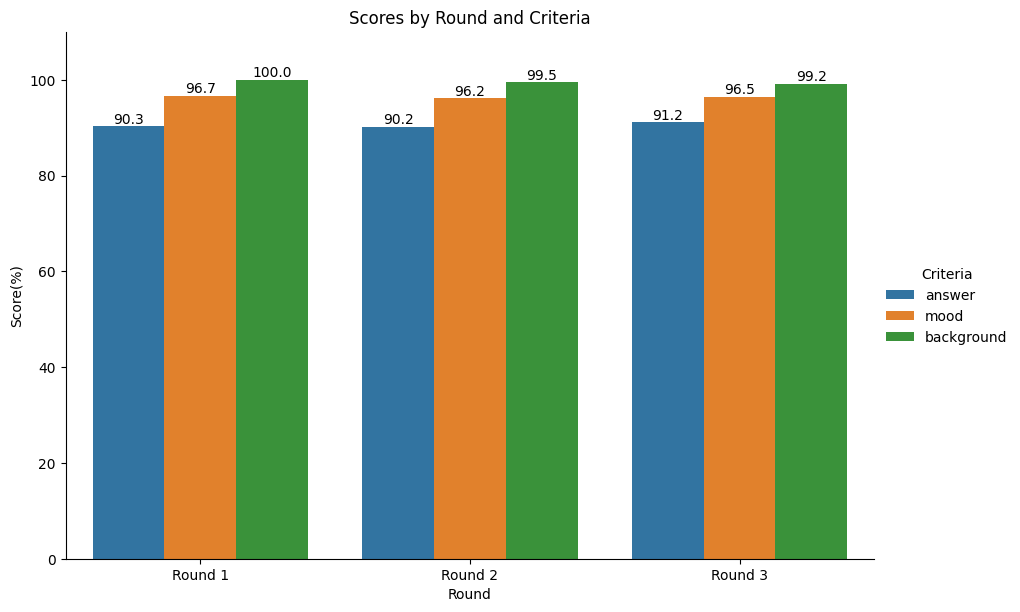

In [98]:
# Criteria for the hue dimension
criteria = ['answer', 'mood', 'background']

# Combine the data into a DataFrame
data = pd.DataFrame({
    'Round': ['Round 1'] * 3 + ['Round 2'] * 3 + ['Round 3'] * 3,
    'Score(%)': score_result1 + score_result2 + score_result3,
    'Criteria': criteria * 3
})

g = sns.catplot(
    data=data,
    x='Round',
    y='Score(%)',
    hue='Criteria',
    kind='bar',
    height=6,
    aspect=1.5
)

ax = g.ax  # Access the axis object
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge')  # Display values with one decimal
    
plt.ylim(0, 110)
plt.title('Scores by Round and Criteria')
plt.show()


In [78]:
data

,round,score,criteria
0,Round 1,90.3,A
1,Round 1,85.6,B
2,Round 1,88.7,C
3,Round 2,96.7,A
4,Round 2,92.4,B
5,Round 2,94.1,C
6,Round 3,100.0,A
7,Round 3,98.5,B
8,Round 3,99.2,C


1 <class 'int'>
